# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-08-13 21:00:14--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   158MB/s    in 0.5s    

2023-08-13 21:00:15 (158 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6

## **Load bioactivity data**

In [35]:
import pandas as pd

In [56]:
data_path = '/content/bioactivity_preprocessed_data.csv'
df = pd.read_csv(data_path)

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [6]:
!pip install rdkit

     |████████████████████████████████| 29.5 MB 21.6 MB/s 


In [57]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [58]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [59]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,active,0.4
1,CHEMBL207028,NC(=O)c1sc(-c2ccccc2)cc1N,inactive,15100.0
2,CHEMBL377085,Cc1cc(C)c2c(N)c(C(N)=O)sc2n1,intermediate,4100.0
3,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,intermediate,4100.0
4,CHEMBL386760,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...,active,100.0
...,...,...,...,...
4591,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,360.0
4592,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,1.8
4593,CHEMBL3707348,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,active,5.1
4594,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,0.3


In [60]:
# Remove rows with missing or non-string values in the canonical_smiles column
df_cleaned = df[df['canonical_smiles'].notnull() & df['canonical_smiles'].apply(lambda x: isinstance(x, str))]

# Check the shape of the cleaned dataframe
df_cleaned.shape

(4592, 4)

In [61]:
df_lipinski = lipinski(df_cleaned.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [62]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,484.431,6.54092,2.0,6.0
1,218.281,2.09620,2.0,3.0
2,221.285,1.59424,2.0,4.0
3,623.845,5.69212,2.0,8.0
4,686.810,6.22484,1.0,12.0
...,...,...,...,...
4587,471.561,4.22260,2.0,6.0
4588,471.561,4.22260,2.0,6.0
4589,465.517,3.31260,2.0,7.0
4590,471.561,4.22260,2.0,6.0


In [63]:
df_cleaned

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,active,0.4
1,CHEMBL207028,NC(=O)c1sc(-c2ccccc2)cc1N,inactive,15100.0
2,CHEMBL377085,Cc1cc(C)c2c(N)c(C(N)=O)sc2n1,intermediate,4100.0
3,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,intermediate,4100.0
4,CHEMBL386760,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...,active,100.0
...,...,...,...,...
4591,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,360.0
4592,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,1.8
4593,CHEMBL3707348,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,active,5.1
4594,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,0.3


Now, let's combine the 2 DataFrame

In [64]:
df_combined = pd.concat([df_cleaned,df_lipinski], axis=1)

In [65]:
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,active,0.4,484.431,6.54092,2.0,6.0
1,CHEMBL207028,NC(=O)c1sc(-c2ccccc2)cc1N,inactive,15100.0,218.281,2.09620,2.0,3.0
2,CHEMBL377085,Cc1cc(C)c2c(N)c(C(N)=O)sc2n1,intermediate,4100.0,221.285,1.59424,2.0,4.0
3,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,intermediate,4100.0,623.845,5.69212,2.0,8.0
4,CHEMBL386760,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...,active,100.0,686.810,6.22484,1.0,12.0
...,...,...,...,...,...,...,...,...
4595,CHEMBL460702,CCOc1ccn(-c2ccc(F)cc2)c(=O)c1C(=O)Nc1ccc(Oc2cc...,active,2.0,NaN,NaN,NaN,NaN
1167,NaN,NaN,NaN,NaN,584.696,6.01942,2.0,5.0
1190,NaN,NaN,NaN,NaN,541.627,5.25220,3.0,5.0
1191,NaN,NaN,NaN,NaN,574.632,5.46192,3.0,5.0


In [68]:
# Reset the index of df_cleaned
df_cleaned_reset = df_cleaned.reset_index(drop=True)

# Concatenate the dataframes with reset indices
df_combined_corrected = pd.concat([df_cleaned_reset, df_lipinski], axis=1)
df_combined_corrected

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,active,0.4,484.431,6.54092,2.0,6.0
1,CHEMBL207028,NC(=O)c1sc(-c2ccccc2)cc1N,inactive,15100.0,218.281,2.09620,2.0,3.0
2,CHEMBL377085,Cc1cc(C)c2c(N)c(C(N)=O)sc2n1,intermediate,4100.0,221.285,1.59424,2.0,4.0
3,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,intermediate,4100.0,623.845,5.69212,2.0,8.0
4,CHEMBL386760,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...,active,100.0,686.810,6.22484,1.0,12.0
...,...,...,...,...,...,...,...,...
4587,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,360.0,471.561,4.22260,2.0,6.0
4588,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,1.8,471.561,4.22260,2.0,6.0
4589,CHEMBL3707348,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,active,5.1,465.517,3.31260,2.0,7.0
4590,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,0.3,471.561,4.22260,2.0,6.0


In [69]:
print(df_combined_corrected['MW'].notnull().sum()), print(len(df_combined_corrected))

4592
4592


(None, None)

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [70]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [76]:
df_combined_corrected.standard_value.describe()

count      4592.000000
mean       1669.228783
std       16927.557638
min           0.000000
25%           2.100000
50%          15.000000
75%         140.000000
max      850000.000000
Name: standard_value, dtype: float64

In [77]:
-np.log10( (10**-9)* 100000000 )

1.0

In [78]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [79]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [80]:
df_norm = norm_value(df_combined_corrected)
df_norm

<ipython-input-79-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,active,484.431,6.54092,2.0,6.0,0.4
1,CHEMBL207028,NC(=O)c1sc(-c2ccccc2)cc1N,inactive,218.281,2.09620,2.0,3.0,15100.0
2,CHEMBL377085,Cc1cc(C)c2c(N)c(C(N)=O)sc2n1,intermediate,221.285,1.59424,2.0,4.0,4100.0
3,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,intermediate,623.845,5.69212,2.0,8.0,4100.0
4,CHEMBL386760,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...,active,686.810,6.22484,1.0,12.0,100.0
...,...,...,...,...,...,...,...,...
4587,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,360.0
4588,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,1.8
4589,CHEMBL3707348,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,active,465.517,3.31260,2.0,7.0,5.1
4590,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,0.3


count      4592.000000
mean       1669.228783
std       16927.557638
min           0.000000
25%           2.100000
50%          15.000000
75%         140.000000
max      850000.000000
Name: standard_value_norm, dtype: float64

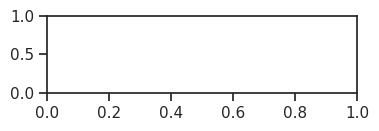

In [103]:
df_norm.standard_value_norm.describe()

In [104]:
df_final = pIC50(df_norm)
df_final

<ipython-input-70-bf09df1ccbf9>:10: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
<ipython-input-70-bf09df1ccbf9>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,active,484.431,6.54092,2.0,6.0,9.397940
1,CHEMBL207028,NC(=O)c1sc(-c2ccccc2)cc1N,inactive,218.281,2.09620,2.0,3.0,4.821023
2,CHEMBL377085,Cc1cc(C)c2c(N)c(C(N)=O)sc2n1,intermediate,221.285,1.59424,2.0,4.0,5.387216
3,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,intermediate,623.845,5.69212,2.0,8.0,5.387216
4,CHEMBL386760,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...,active,686.810,6.22484,1.0,12.0,7.000000
...,...,...,...,...,...,...,...,...
4587,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,6.443697
4588,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,8.744727
4589,CHEMBL3707348,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,active,465.517,3.31260,2.0,7.0,8.292430
4590,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,9.522879


In [83]:
df_final.pIC50.describe()

count    4592.000000
mean             inf
std              NaN
min         3.070581
25%         6.853872
50%         7.823909
75%         8.677781
max              inf
Name: pIC50, dtype: float64

In [109]:
#Filter Out Rows with Infinite Values:
df_final = df_final[np.isfinite(df_final['pIC50'])]
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,active,484.431,6.54092,2.0,6.0,9.397940
1,CHEMBL207028,NC(=O)c1sc(-c2ccccc2)cc1N,inactive,218.281,2.09620,2.0,3.0,4.821023
2,CHEMBL377085,Cc1cc(C)c2c(N)c(C(N)=O)sc2n1,intermediate,221.285,1.59424,2.0,4.0,5.387216
3,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,intermediate,623.845,5.69212,2.0,8.0,5.387216
4,CHEMBL386760,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...,active,686.810,6.22484,1.0,12.0,7.000000
...,...,...,...,...,...,...,...,...
4587,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,6.443697
4588,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,8.744727
4589,CHEMBL3707348,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,active,465.517,3.31260,2.0,7.0,8.292430
4590,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,9.522879


In [110]:
df_final.pIC50.describe()

count    4591.000000
mean        7.666900
std         1.280080
min         3.070581
25%         6.853872
50%         7.823909
75%         8.676749
max        10.853872
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [111]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL281957,CCN(CC)C/C=C/c1nc(O)c2c(ccc3nc(Nc4c(Cl)cccc4Cl...,active,484.431,6.54092,2.0,6.0,9.397940
1,CHEMBL207028,NC(=O)c1sc(-c2ccccc2)cc1N,inactive,218.281,2.09620,2.0,3.0,4.821023
4,CHEMBL386760,COc1ccc(N(C(=O)Oc2c(C)cccc2C)c2ccnc(Nc3cc(OC)c...,active,686.810,6.22484,1.0,12.0,7.000000
6,CHEMBL215943,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccc2nc(N...,active,535.570,5.62042,2.0,6.0,6.263603
7,CHEMBL373882,CNc1ncnc(-c2cccnc2Oc2ccc(F)c(C(=O)Nc3cc(C(F)(F...,inactive,598.605,5.56570,2.0,9.0,4.602060
...,...,...,...,...,...,...,...,...
4587,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,6.443697
4588,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,8.744727
4589,CHEMBL3707348,CC#CC(=O)N1CCC[C@H]1c1nc(-c2ccc(C(=O)Nc3ccccn3...,active,465.517,3.31260,2.0,7.0,8.292430
4590,CHEMBL3936761,C=CC(=O)N1CCC([C@@H]2CCNc3c(C(N)=O)c(-c4ccc(Oc...,active,471.561,4.22260,2.0,6.0,9.522879


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [112]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

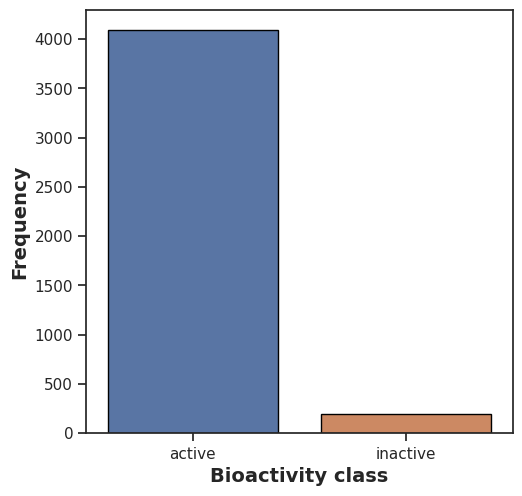

In [113]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

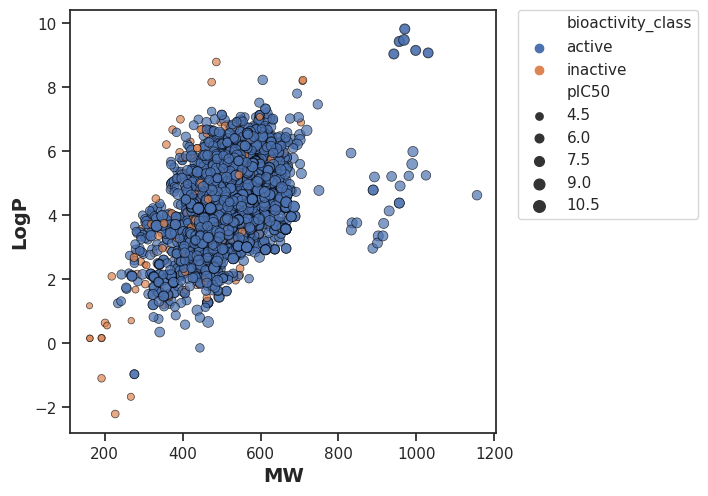

In [114]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

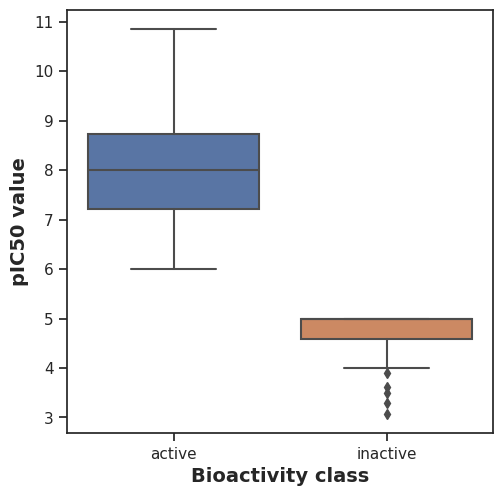

In [115]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [116]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [117]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,814308.0,8.350044e-126,0.05,Different distribution (reject H0)


#### **MW**

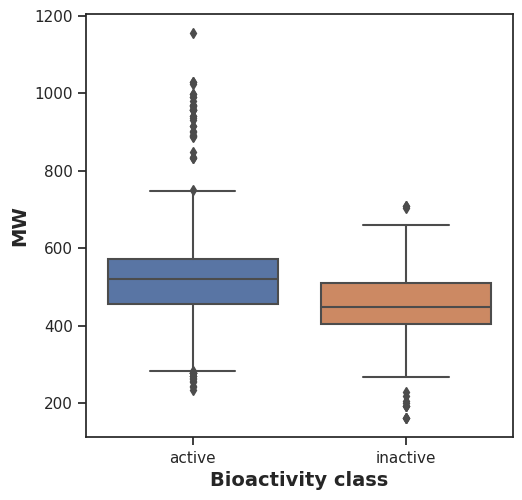

In [118]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [119]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,581524.5,1.656149e-24,0.05,Different distribution (reject H0)


#### **LogP**

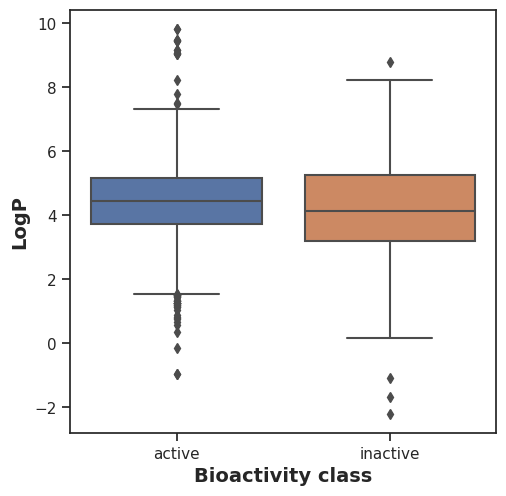

In [120]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [121]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,468075.5,0.000357,0.05,Different distribution (reject H0)


#### **NumHDonors**

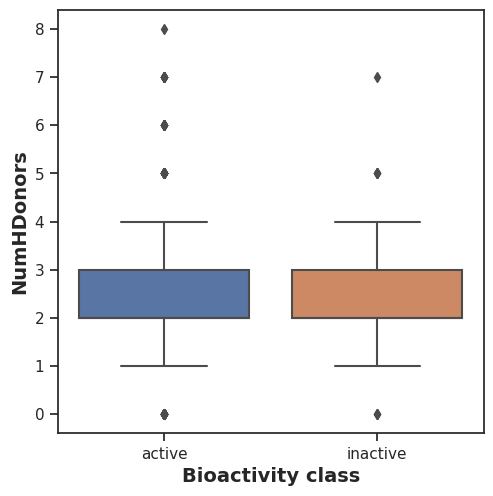

In [122]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [123]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,398704.0,0.593933,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

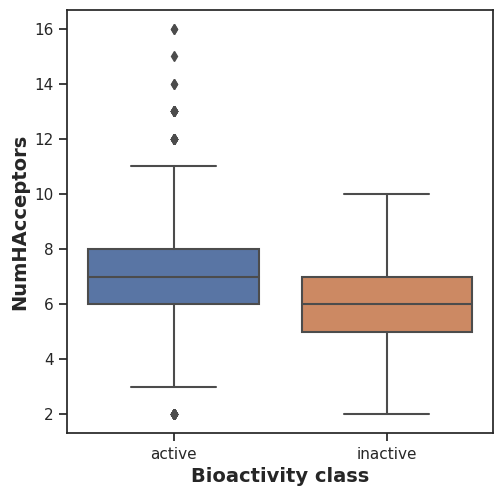

In [124]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [125]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,526700.0,1.150213e-12,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only NumHDonors exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, LogP and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 9%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: plot_MW_vs_LogP.pdf (deflated 15%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: bioactivity_data_preprocessed.csv (deflated 80%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
